# Fitting




In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

Note the conversion factor from $\sigma$ to FWHM is $2\sqrt{2\ln{2}} \approx 2.355$, see also
https://en.wikipedia.org/wiki/Full_width_at_half_maximum

## PySpecKit

PySpecKit is an extensible spectroscopic analysis toolkit for astronomy. See
http://pyspeckit.bitbucket.org/html/sphinx/index.html

They now have a new URL.

Installing this with
```
    pip install pyspeckit
```
resulted in an error 
```
    AttributeError: module 'distutils.config' has no attribute 'ConfigParser'
```
turns out this was a python2/3 hack that was needed. The current released version of pyspeckit did not handle this. A manual install of the development release solved this, although a update to pip may be needed as well:
```
    pip install --upgrade pip
    pip install https://bitbucket.org/pyspeckit/pyspeckit/get/master.tar.gz
```


### modify to run

The cell below is an adapted version of a gaussian fit case from the pySpecKit manual.  By default, this will create some known data with noise. Copy the cell and change it to make it work with our spectrum from n6503.  How does it compare to scipy's curve_fit ?   Note that in this method initial conditions are generated to help in a robust way of fitting the gauss.

The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.


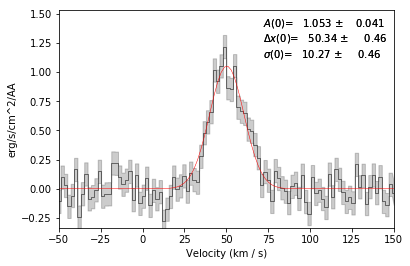

In [2]:
import pyspeckit

# set up a gauss (amp,center,sigma)
xaxis = np.linspace(-50.0,150.0,100)
amp = 1.0
sigma = 10.0
center = 50.0
synth_data = amp*np.exp(-(xaxis-center)**2/(sigma**2 * 2.))

# Add 10% noise (but fix the random seed)
np.random.seed(123)
stddev = 0.1
noise = np.random.randn(xaxis.size)*stddev
error = stddev*np.ones_like(synth_data)
data = noise+synth_data

# this will give a "blank header" warning, which is fine
sp = pyspeckit.Spectrum(data=data, error=error, xarr=xaxis,
                        xarrkwargs={'unit':'km/s'},
                        unit='erg/s/cm^2/AA')

sp.plotter()

# Fit with automatic guesses
sp.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
amplitude_guess = data.max()
center_guess = (data*xaxis).sum()/data.sum()
width_guess = data.sum() / amplitude_guess / np.sqrt(2*np.pi)
guesses = [amplitude_guess, center_guess, width_guess]
sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill')
sp.specfit.plot_fit()